## Gerekli kütüphanelerin yüklenmesi

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import missingno as msno

## Veri setinin yüklenmesi

In [3]:
data = pd.read_csv('/content/drive/MyDrive/GlobalAIHub/AB_NYC_2019.csv')

In [4]:
df = data.copy()

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Veri setinin incelenmesi

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [9]:
df.shape

(48895, 16)

In [10]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [11]:
df.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [12]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [13]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [14]:
df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [15]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [16]:
df.isnull().sum() / len(df) * 100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [17]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [18]:
df.duplicated().sum()

0

## Eksik veri, outlier veri analizi

<Axes: >

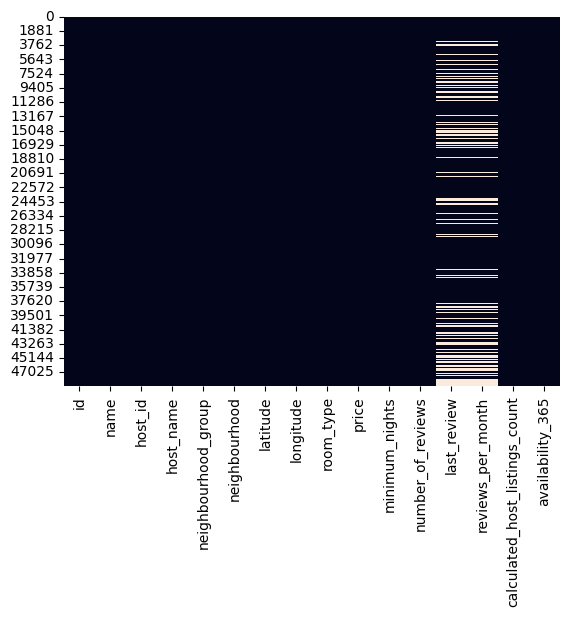

In [19]:
sns.heatmap(df.isnull(), cbar = False)

<Axes: >

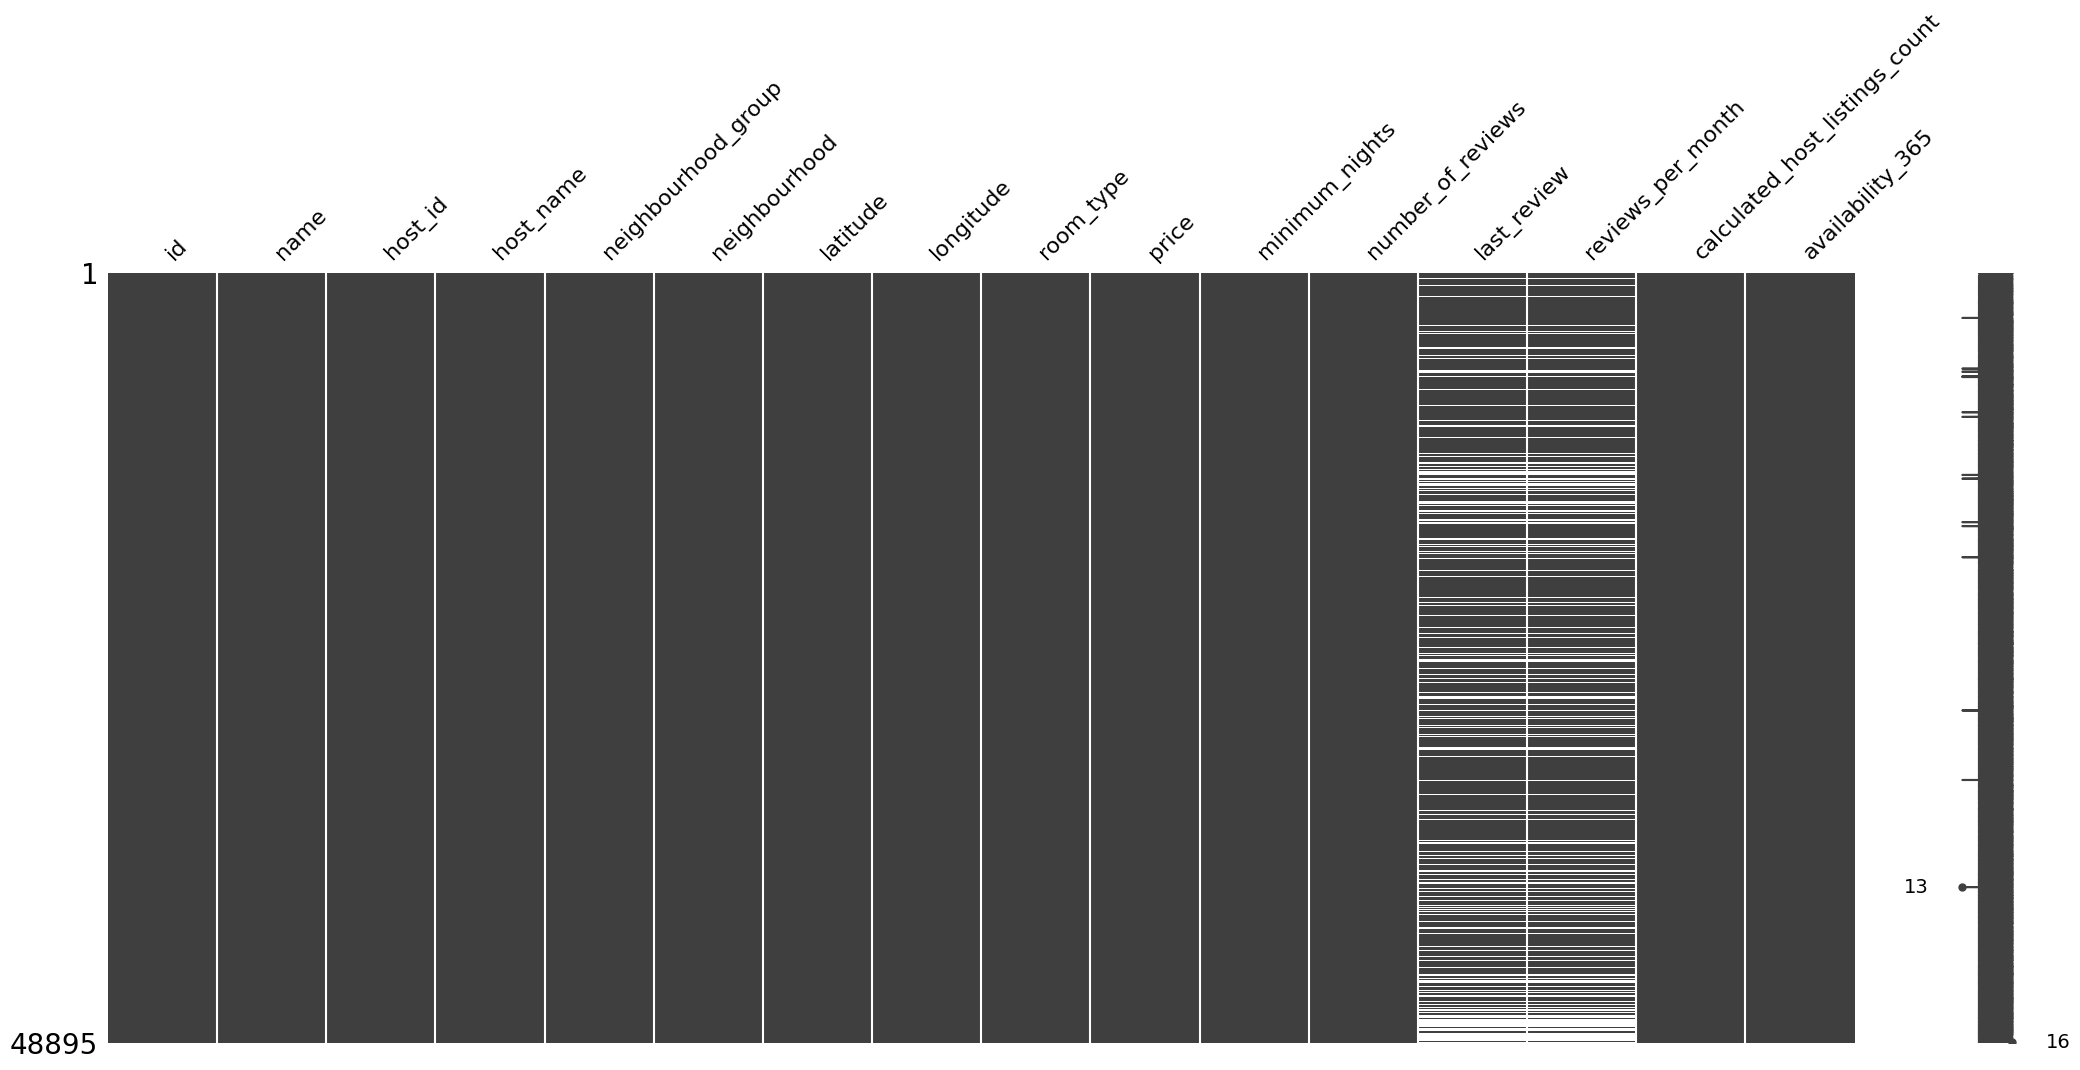

In [20]:
msno.matrix(df)

<Axes: >

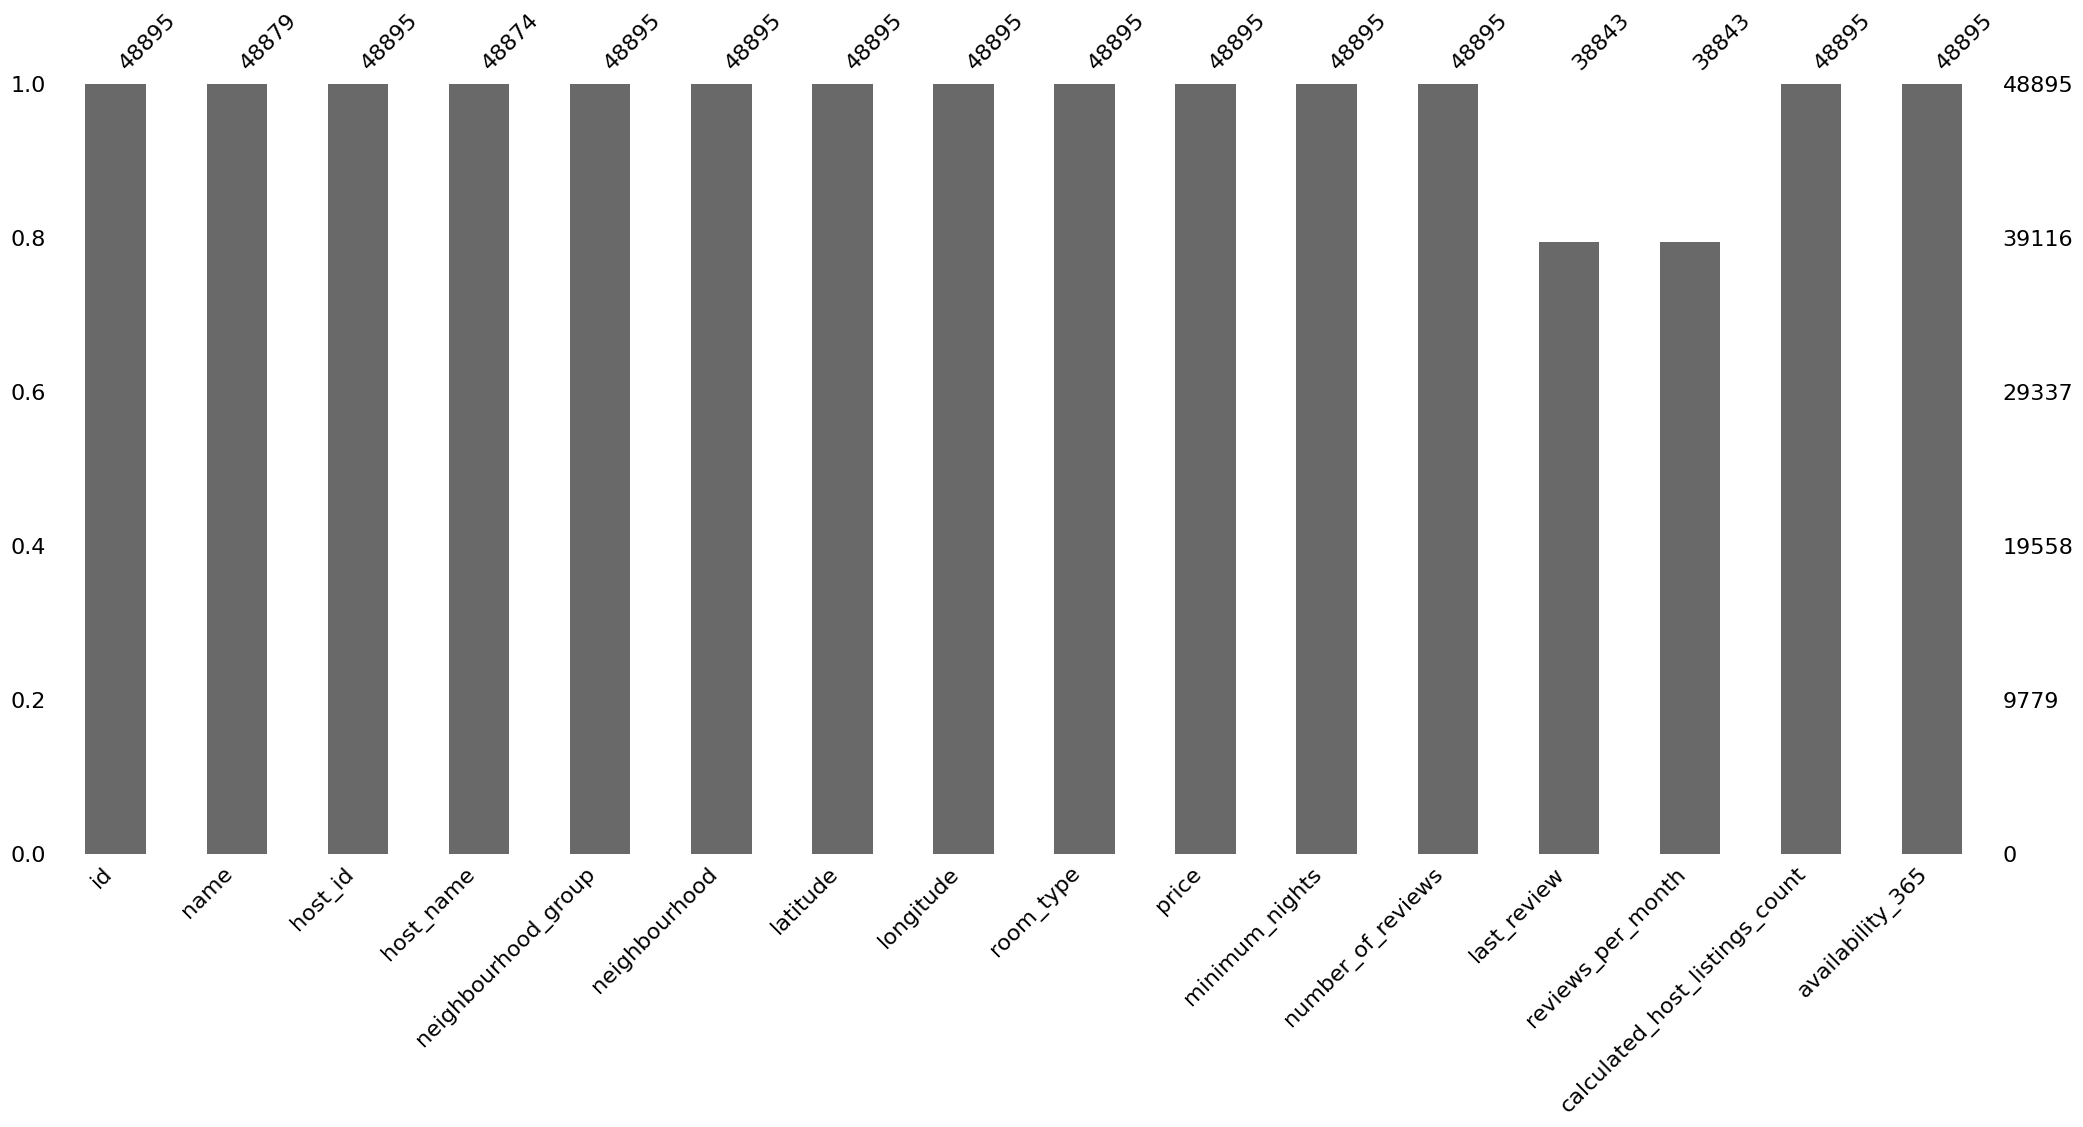

In [21]:
msno.bar(df)

<Axes: >

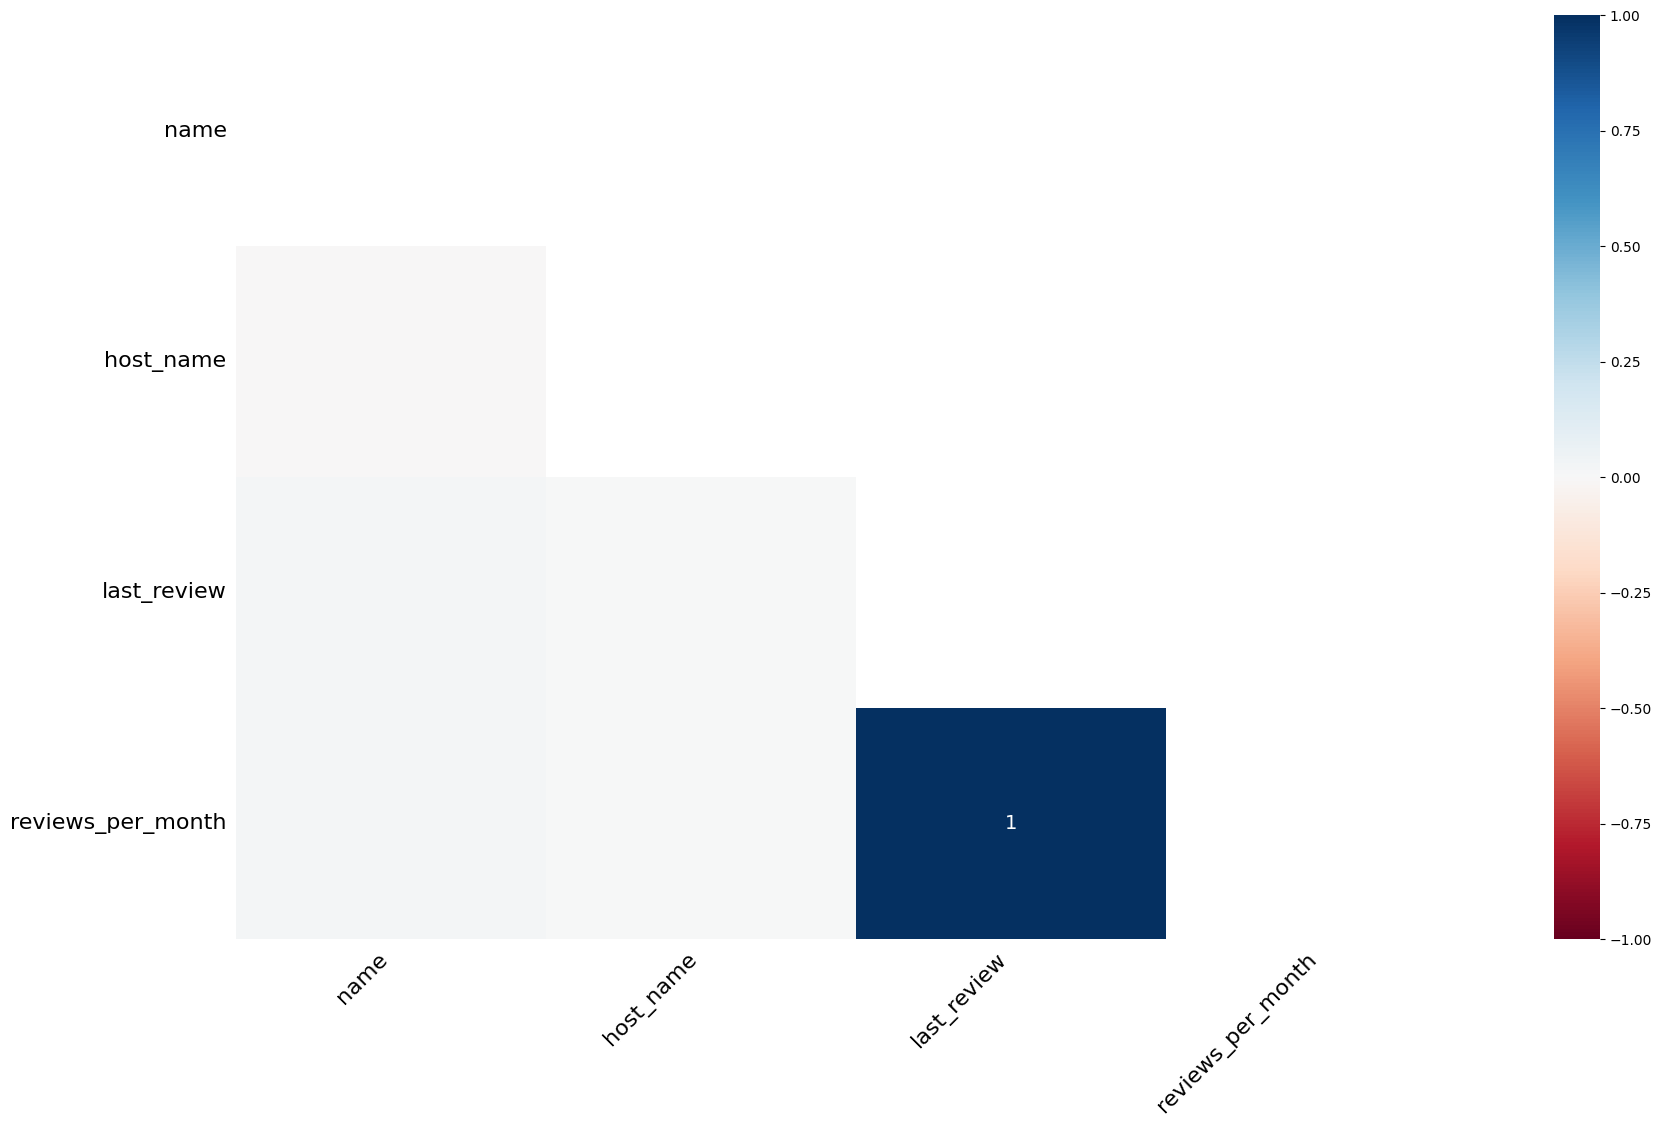

In [22]:
msno.heatmap(df)

In [23]:
df['latitude'].describe()

count    48895.000000
mean        40.728949
std          0.054530
min         40.499790
25%         40.690100
50%         40.723070
75%         40.763115
max         40.913060
Name: latitude, dtype: float64

<Axes: ylabel='latitude'>

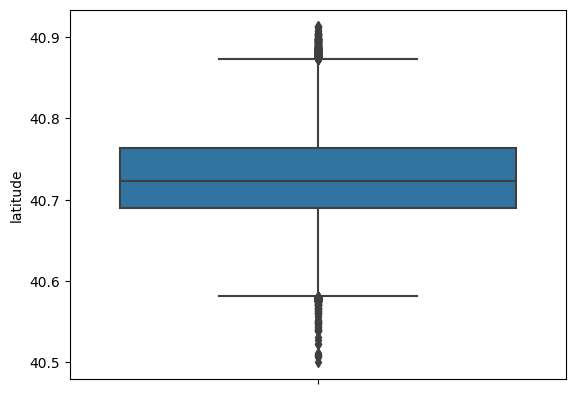

In [24]:
sns.boxplot(y=df['latitude'])

In [25]:
df['longitude'].describe()

count    48895.000000
mean       -73.952170
std          0.046157
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936275
max        -73.712990
Name: longitude, dtype: float64

<Axes: ylabel='longitude'>

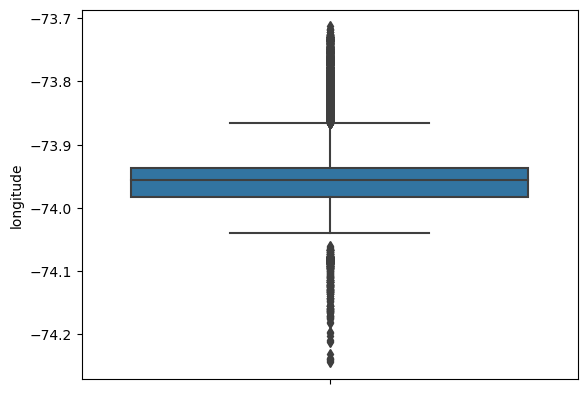

In [26]:
sns.boxplot(y=df['longitude'])

In [27]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<Axes: ylabel='price'>

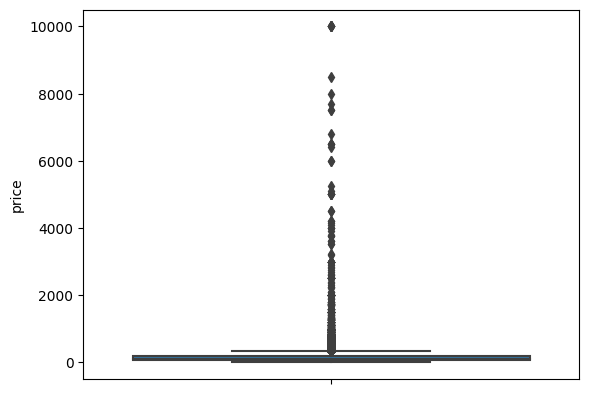

In [28]:
sns.boxplot(y=df['price'])

In [29]:
df['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

<Axes: ylabel='minimum_nights'>

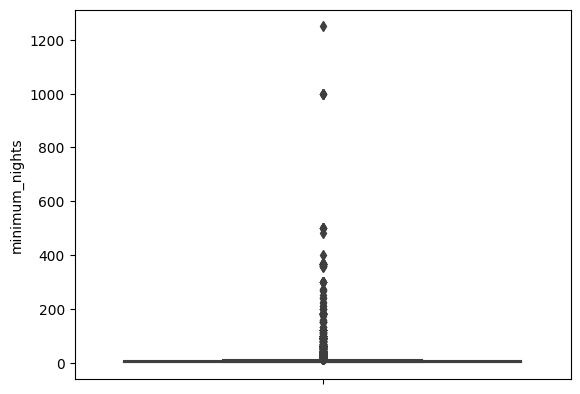

In [30]:
sns.boxplot(y=df['minimum_nights'])

In [31]:
df['number_of_reviews'].describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

<Axes: ylabel='number_of_reviews'>

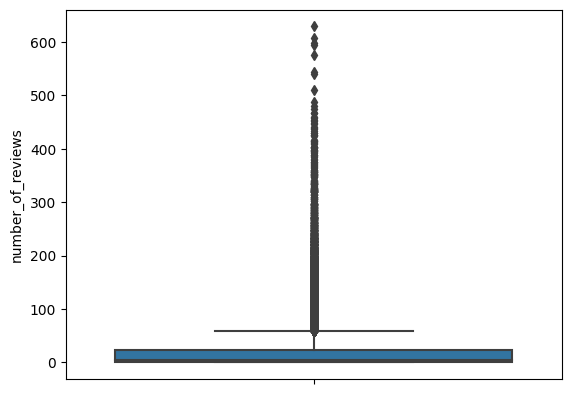

In [32]:
sns.boxplot(y=df['number_of_reviews'])

In [33]:
df['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

<Axes: ylabel='reviews_per_month'>

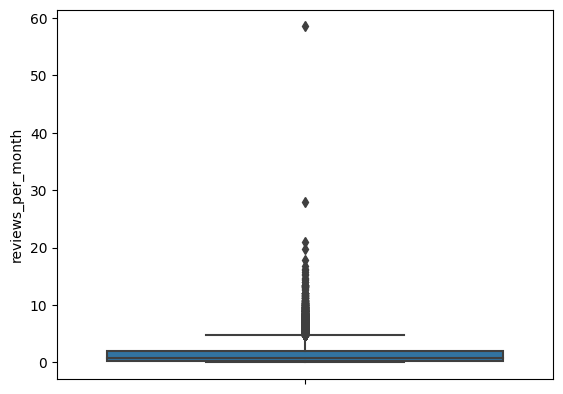

In [34]:
sns.boxplot(y=df['reviews_per_month'])

In [35]:
df['calculated_host_listings_count'].describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

<Axes: ylabel='calculated_host_listings_count'>

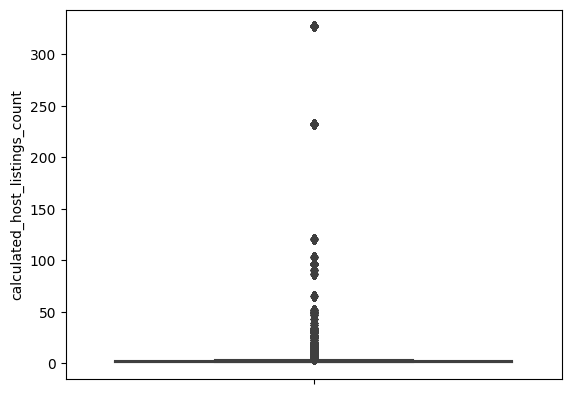

In [36]:
sns.boxplot(y=df['calculated_host_listings_count'])

## Veri dağılımlarının incelenmesi

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>, <Axes: >]],
      dtype=object)

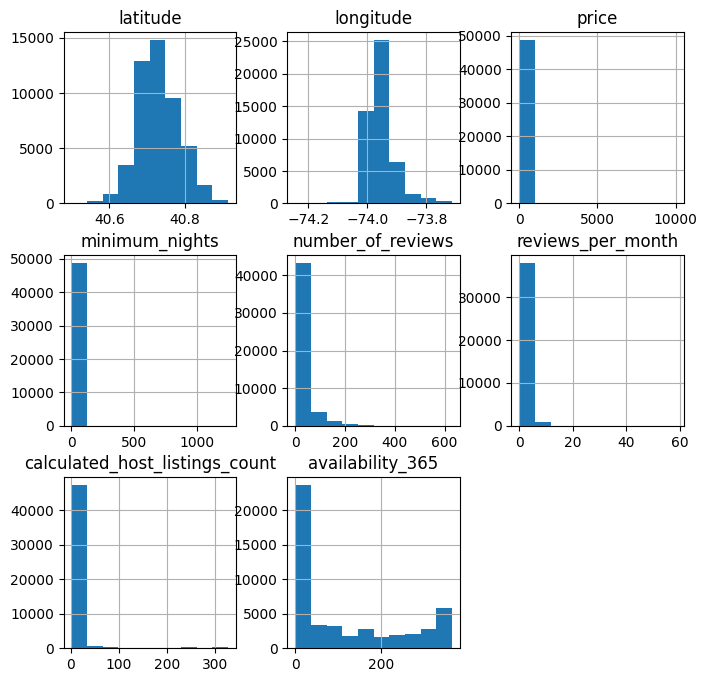

In [37]:
df.hist(['latitude', 'longitude', 'price', 'minimum_nights',	'number_of_reviews', 'reviews_per_month',	'calculated_host_listings_count',	'availability_365'],figsize=(8,8))

## Veri Görselleştirme

Text(0.5, 1.0, 'Neighbourhood Group')

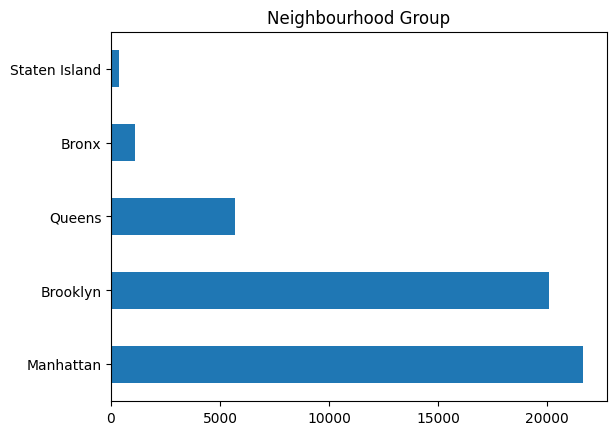

In [38]:
df["neighbourhood_group"].value_counts().plot.barh().set_title("Neighbourhood Group")

<Axes: xlabel='neighbourhood_group', ylabel='count'>

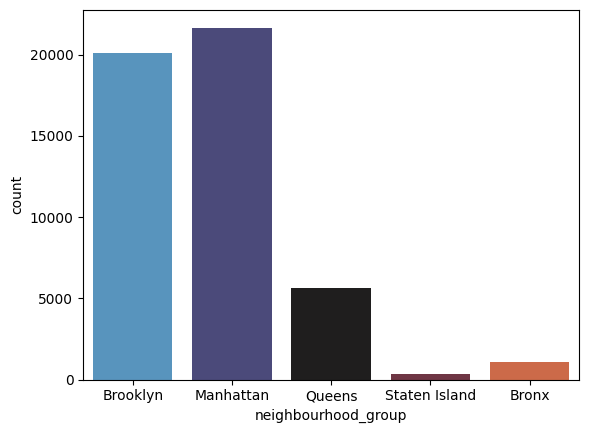

In [39]:
sns.countplot(data=df,x="neighbourhood_group",palette="icefire")

Text(0.5, 1.0, 'Neighbourhood Group - Price')

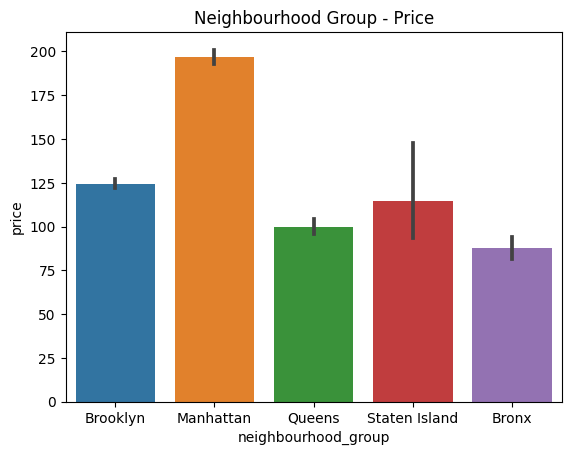

In [40]:
sns.barplot(x="neighbourhood_group", y="price", data=df)
plt.title("Neighbourhood Group - Price")

<ipython-input-41-157b2b154f9d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))


<Axes: >

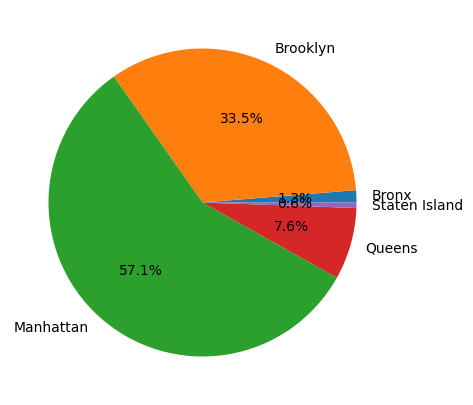

In [41]:
df.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))

<Axes: xlabel='room_type', ylabel='count'>

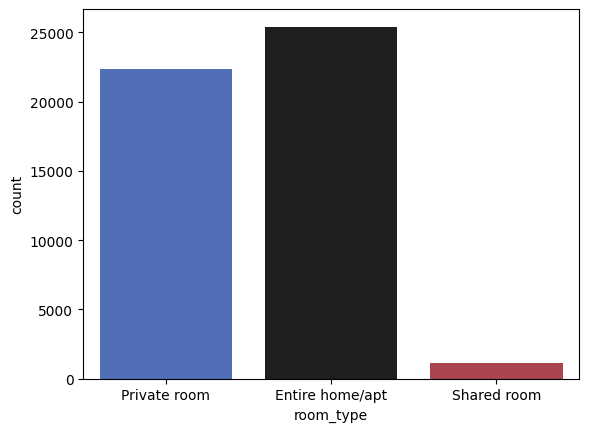

In [42]:
sns.countplot(data=df,x="room_type",palette="icefire")

Text(0.5, 1.0, 'Room Type - Price')

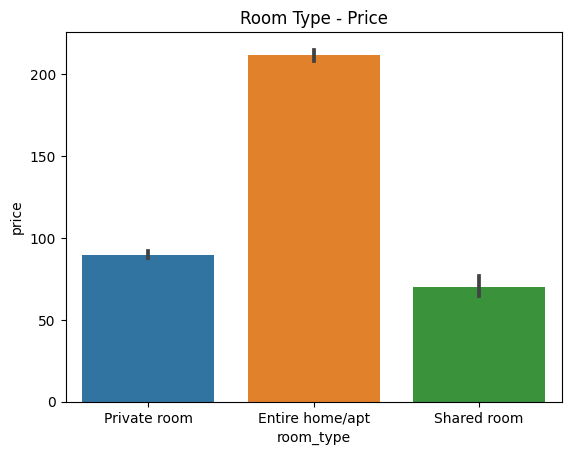

In [43]:
sns.barplot(x="room_type", y="price", data=df)
plt.title("Room Type - Price")

<ipython-input-44-57a524987454>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))


<Axes: >

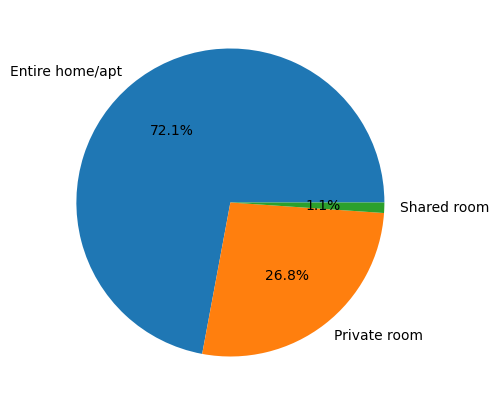

In [44]:
df.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))

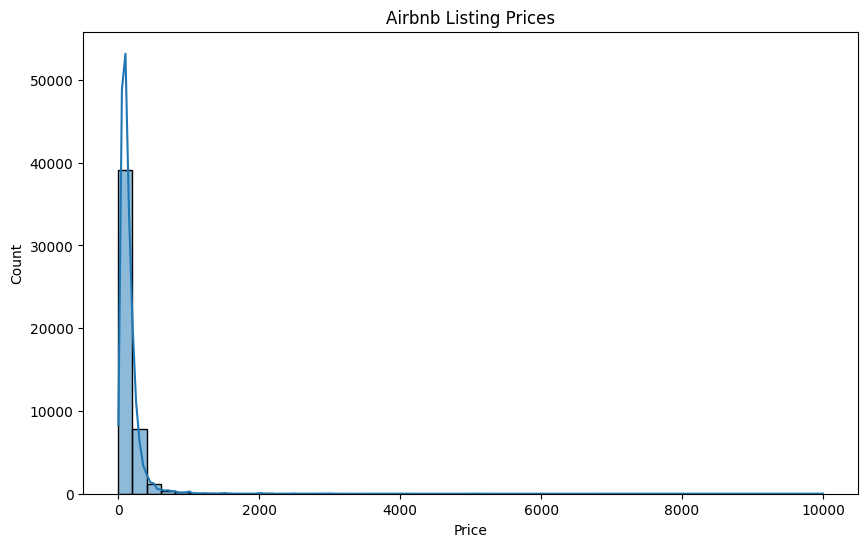

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=50, kde=True)
plt.title('Airbnb Listing Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

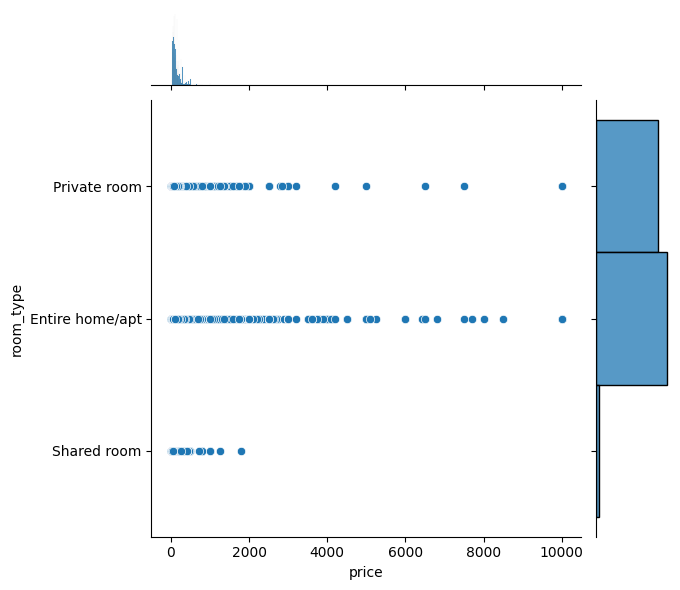

In [46]:
sns.jointplot(x="price", y=df["room_type"], data=df)

<Axes: xlabel='number_of_reviews', ylabel='Count'>

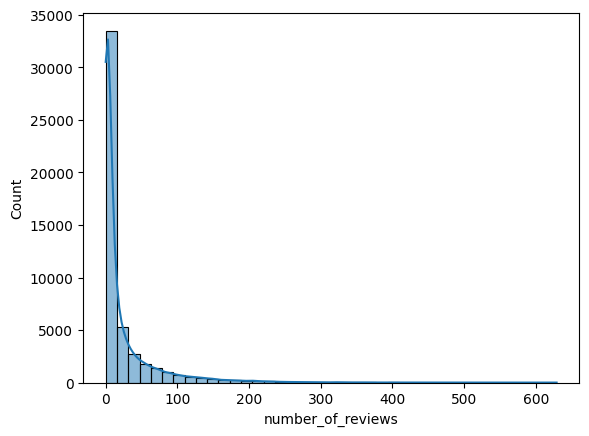

In [47]:
sns.histplot(df["number_of_reviews"], kde=True, bins=40)

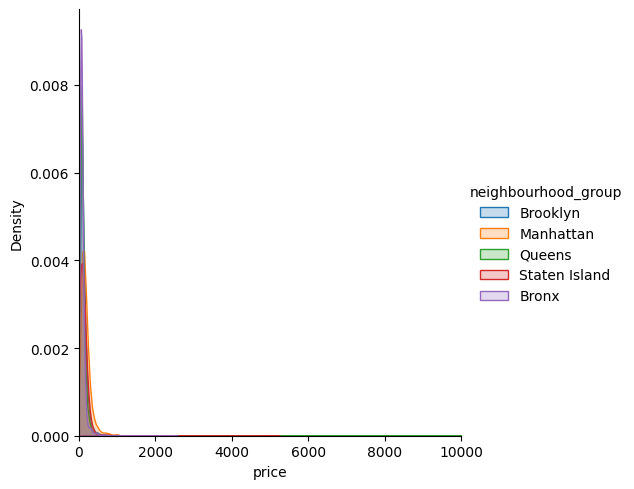

In [48]:
(sns.FacetGrid(df, hue="neighbourhood_group", height=5, xlim=(0, 10000)).map(sns.kdeplot, "price", fill=True).add_legend())

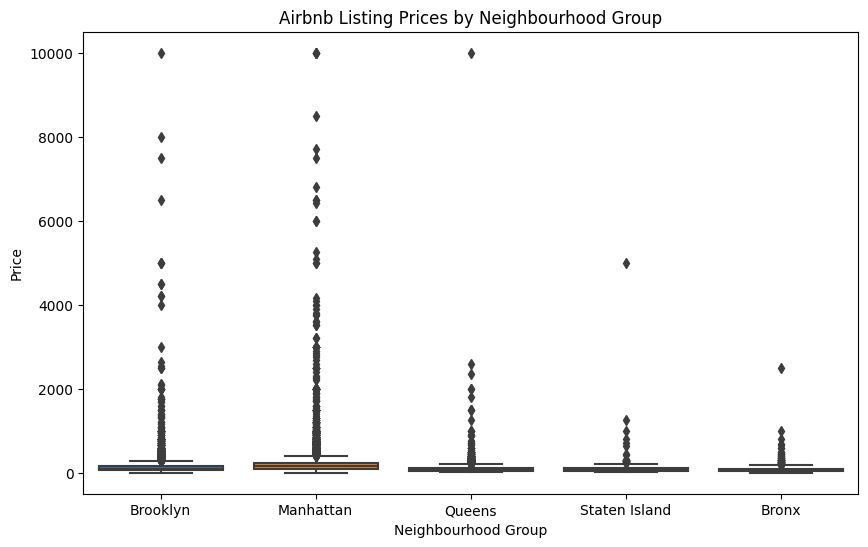

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='price')
plt.title('Airbnb Listing Prices by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

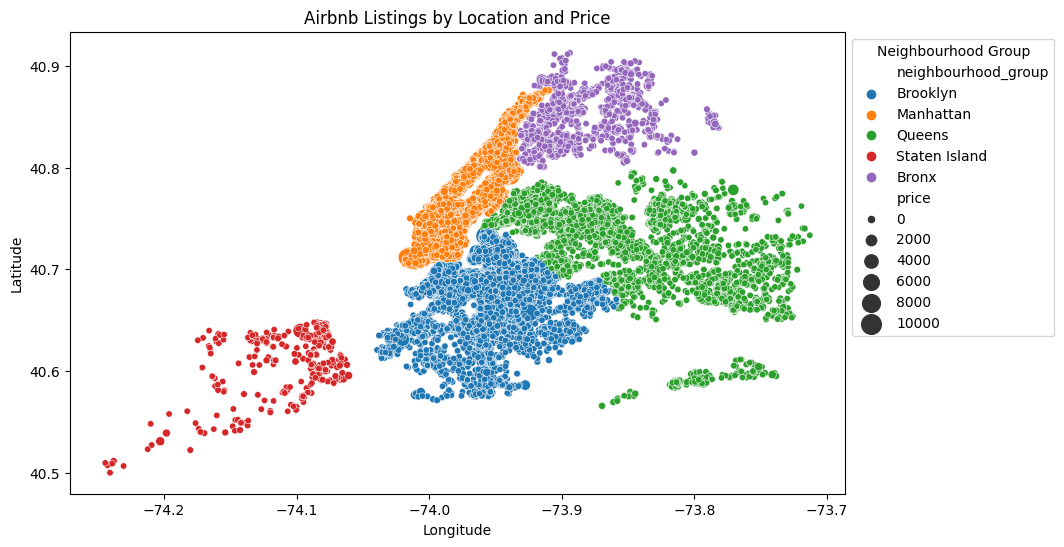

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', size='price', sizes=(20, 200))
plt.title('Airbnb Listings by Location and Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

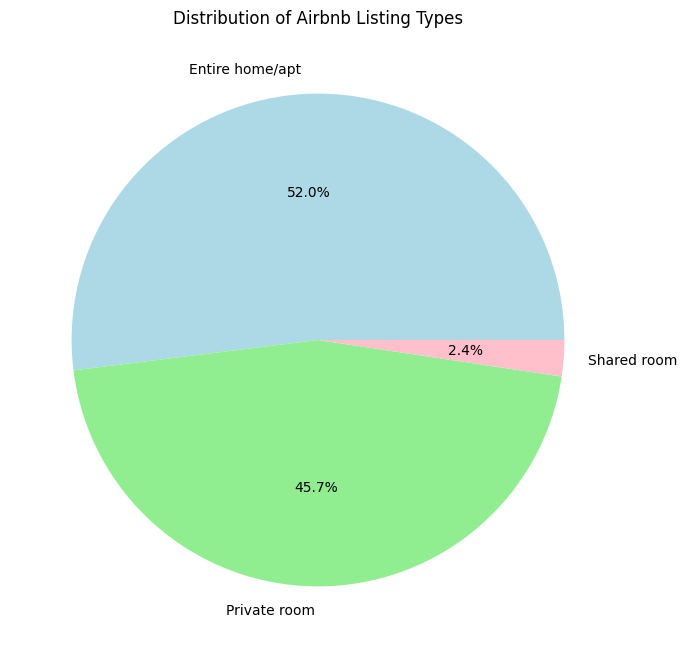

In [51]:
plt.figure(figsize=(8, 8))
df['room_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'pink', 'lightcoral'])
plt.title('Distribution of Airbnb Listing Types')
plt.ylabel('')
plt.show()

<ipython-input-52-07e306583c98>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


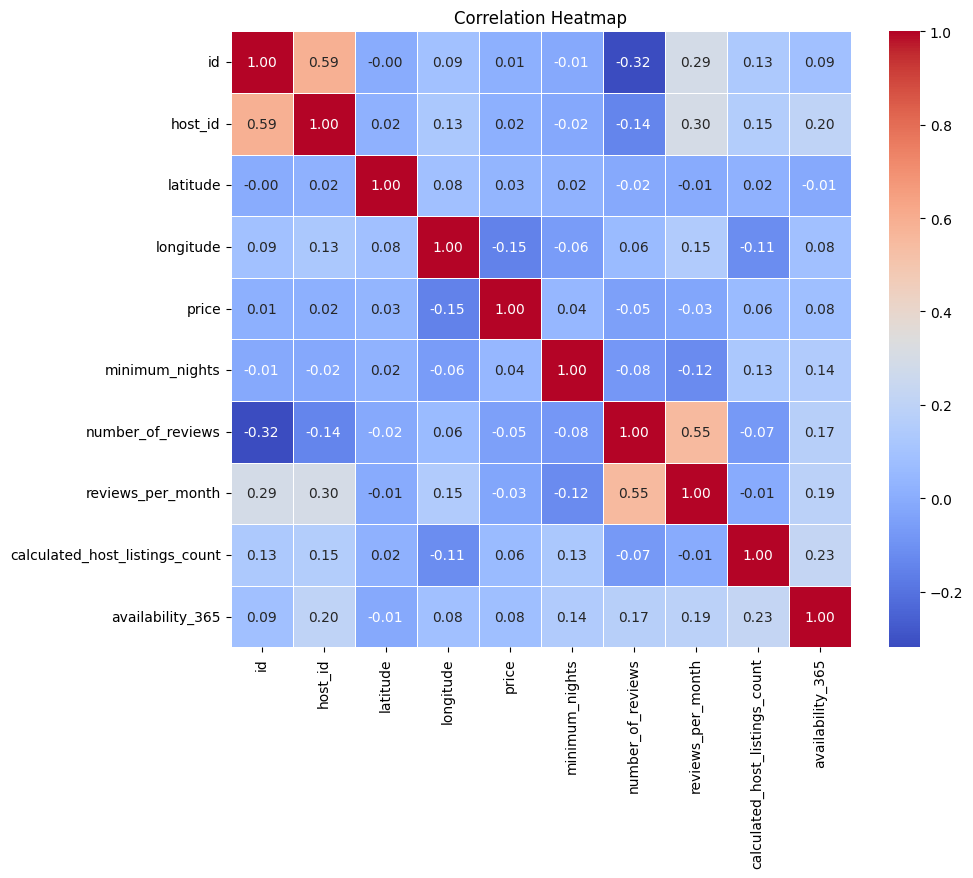

In [52]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

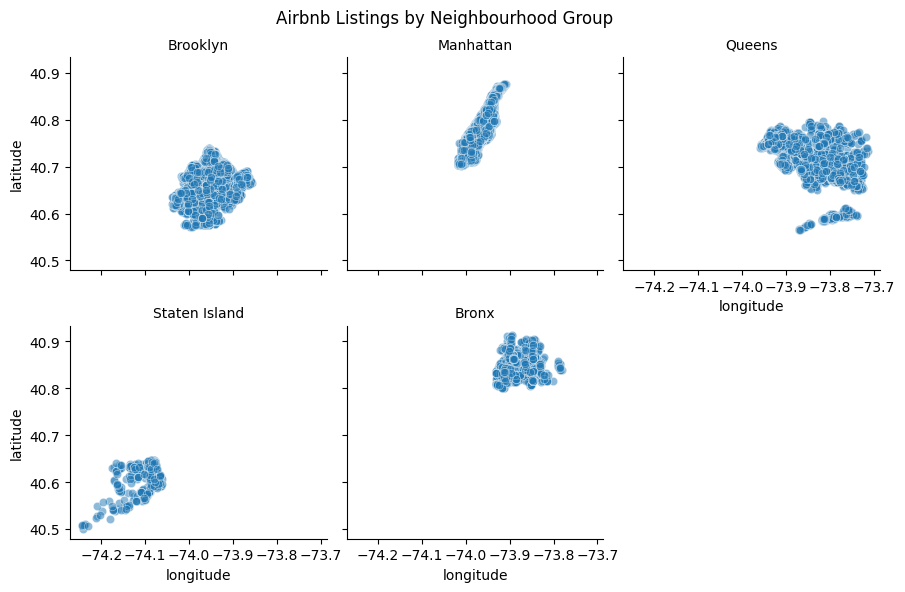

In [53]:
g = sns.FacetGrid(df, col='neighbourhood_group', col_wrap=3)
g.map(sns.scatterplot, 'longitude', 'latitude', alpha=0.5)
g.set_titles(col_template='{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Airbnb Listings by Neighbourhood Group')
plt.show()

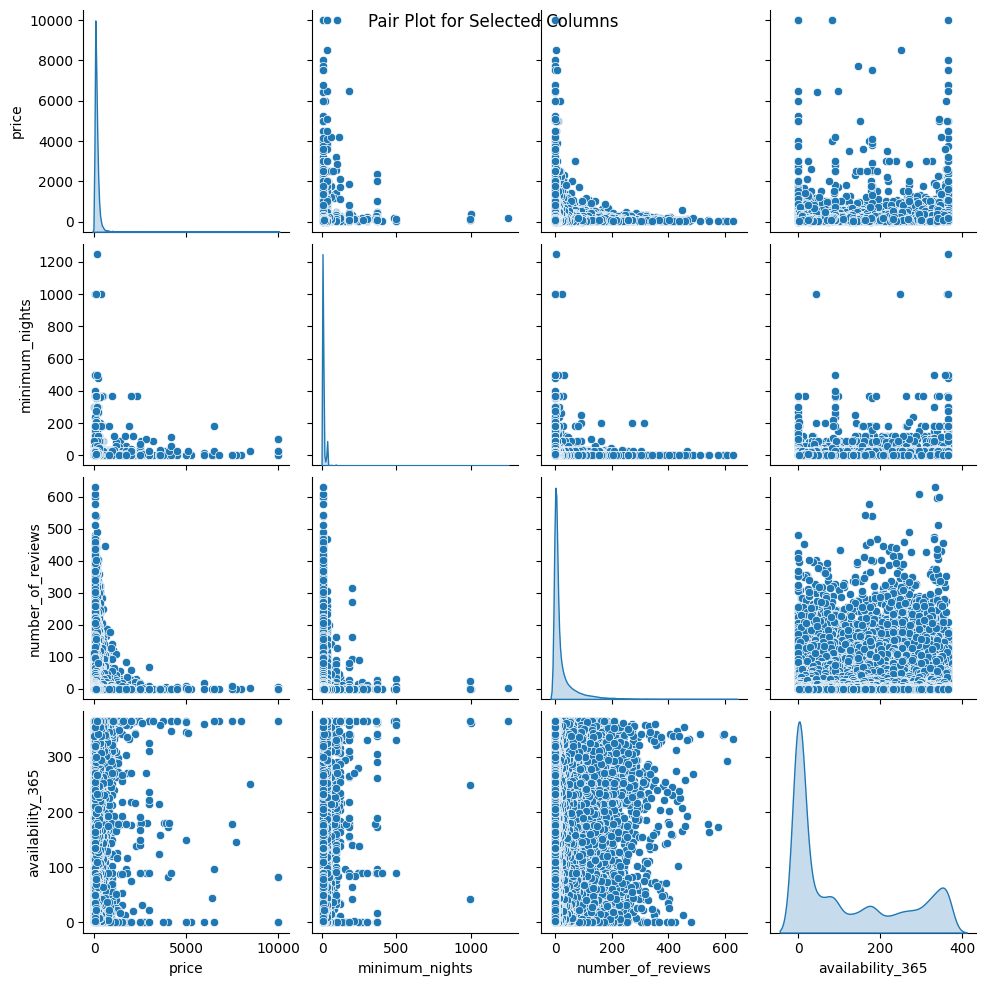

In [54]:
selected_columns = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']
sns.pairplot(df[selected_columns], diag_kind='kde')
plt.suptitle('Pair Plot for Selected Columns')
plt.show()

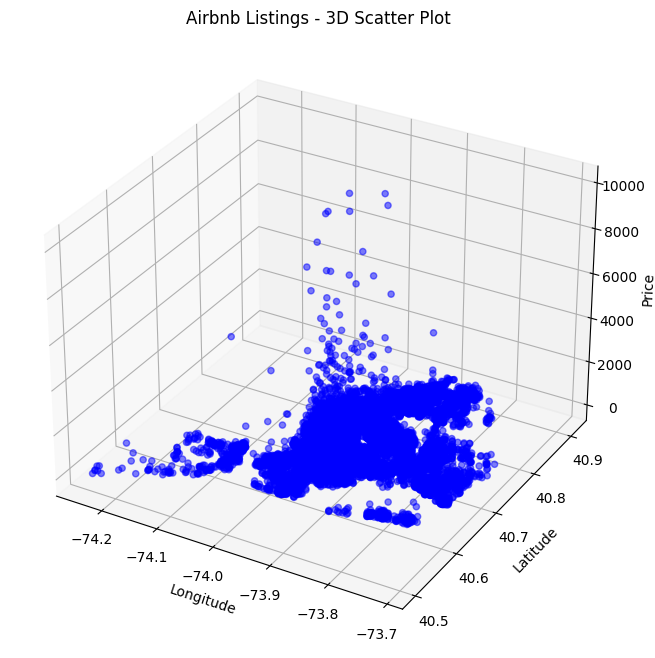

In [55]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['longitude'], df['latitude'], df['price'], c='blue', alpha=0.5)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Price')
plt.title('Airbnb Listings - 3D Scatter Plot')
plt.show()

<Axes: xlabel='neighbourhood_group', ylabel='price'>

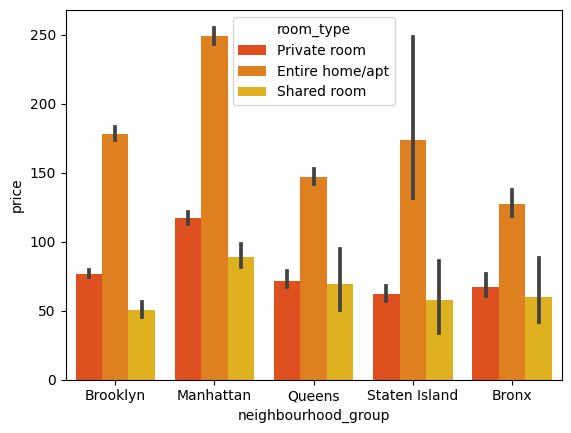

In [56]:
sns.barplot(x='neighbourhood_group', y='price', hue= 'room_type', data=df, palette="autumn")

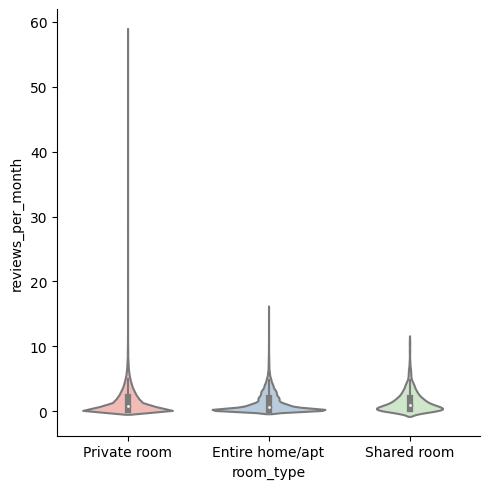

In [57]:
sns.catplot(x="room_type", y='reviews_per_month', kind="violin", data=df, palette="Pastel1")

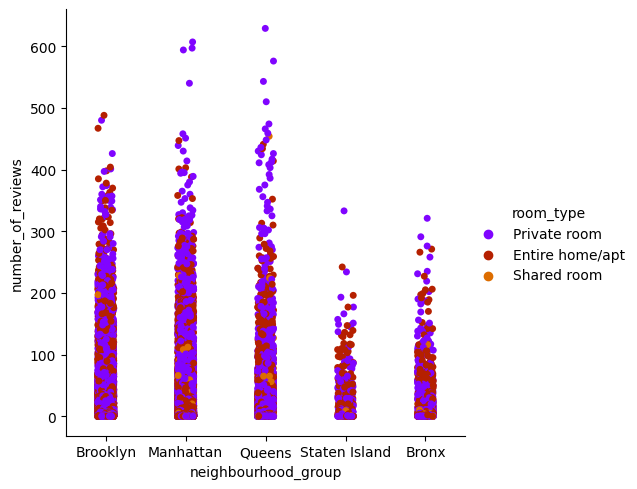

In [58]:
sns.catplot(x='neighbourhood_group', y='number_of_reviews', data=df, hue='room_type', palette="gnuplot")

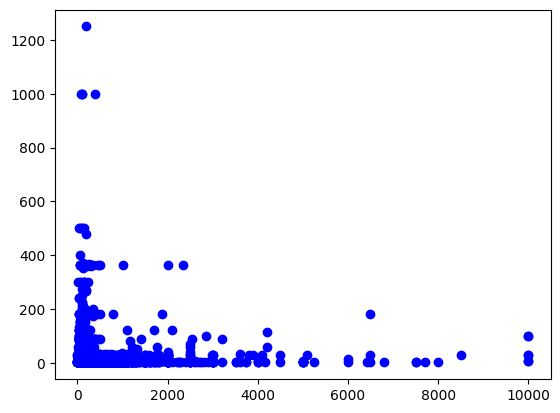

In [59]:
plt.scatter(df['price'], df['minimum_nights'], color='blue')

Text(0.5, 1.0, 'Neighbourhood Group - Calculated Host Listings Count')

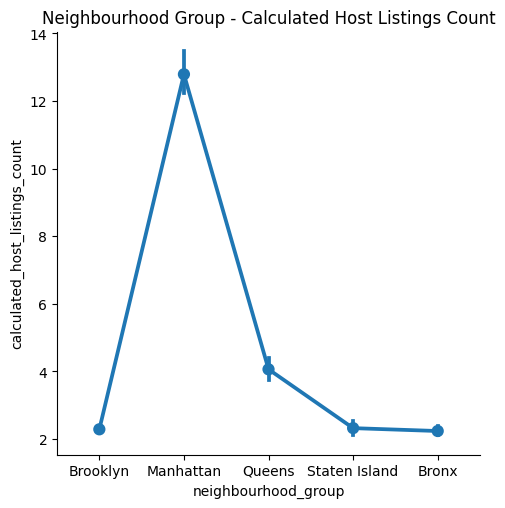

In [60]:
sns.catplot(x="neighbourhood_group", y="calculated_host_listings_count", kind="point", data=df)
plt.title("Neighbourhood Group - Calculated Host Listings Count")